0.009406712855191457


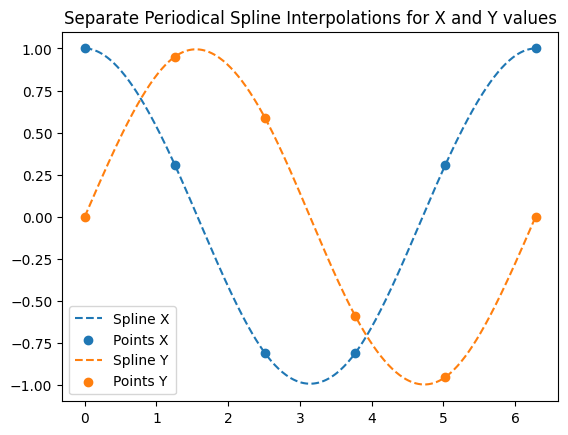

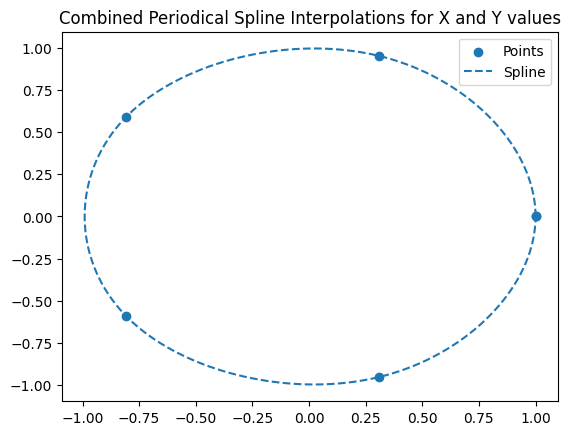

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_periodical_moments(xs, ys):
    # A*x = c*b
    A = (+ np.eye(len(ys)-1, k=1, dtype=float) * 1
         + np.eye(len(ys)-1, k=0, dtype=float) * 4
         + np.eye(len(ys)-1, k=-1, dtype=float) * 1)
    A[0, len(ys)-2] = 1
    A[len(ys)-2, 0] = 1

    c = 6 / (xs[1]-xs[0])**2
    b = np.roll(ys[1:], -1) - 2*ys[1:] + ys[:-1]

    m = np.linalg.solve(A, c * b)

    return np.concatenate(([m[-1]], m))

def s(x, xs, ys, ms):
    i_i1 = np.argmax(xs >= x)
    i_i = i_i1 - 1

    m_i = ms[i_i]
    m_i1 = ms[i_i1]
    x_i = xs[i_i]
    x_i1 = xs[i_i1]
    y_i = ys[i_i]
    y_i1 = ys[i_i1]
    h = x_i1 - x_i

    return (+ 1/(6*h) * ((x_i1-x)**3 * m_i + (x-x_i)**3 * m_i1)
            + 1/h * ((x_i1-x) * y_i + (x-x_i) * y_i1)
            - h/6 * ((x_i1-x) * m_i + (x-x_i) * m_i1))

def s_m(x, xs, ys, ms):
    ys_fitted = []
    for i_x in x:
        ys_fitted.append(s(i_x, xs, ys, ms))
    return ys_fitted

n = 6
t = np.linspace(start=0, stop=2*np.pi, num=n)
x = np.cos(t)
y = np.sin(t)


# interpolate x and y separately
ts_fitted = np.linspace(t[0], t[-1], 359)
x_perfect = np.cos(ts_fitted)
y_perfect = np.sin(ts_fitted)

mx = calculate_periodical_moments(t, x)
xs_fitted = s_m(ts_fitted, t, x, mx)

my = calculate_periodical_moments(t, y)
ys_fitted = s_m(ts_fitted, t, y, my)

comb_error = np.linalg.norm(np.power(np.power(x_perfect-xs_fitted, 2) + np.power(y_perfect-ys_fitted, 2), 1/2) , np.inf) 
print(comb_error)

plt.plot(ts_fitted, xs_fitted, label="Spline X", linestyle="--")
plt.scatter(t, x, label="Points X")


plt.plot(ts_fitted, ys_fitted, label="Spline Y", linestyle="--")
plt.scatter(t, y, label="Points Y")
plt.legend()
plt.title("Separate Periodical Spline Interpolations for X and Y values")
plt.show()

# combine
plt.scatter(x, y, label="Points")
plt.plot(xs_fitted, ys_fitted, label="Spline", linestyle="--")
plt.legend()
plt.title("Combined Periodical Spline Interpolations for X and Y values")
plt.show()


